<a href="https://colab.research.google.com/github/Keqing1109/api/blob/main/RSM8413/A2/Code_Group_Assignment_Two_A2_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)
import keras_tuner as kt
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.ensemble import IsolationForest
from tensorflow.keras.models import load_model


In [ ]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
train = pd.read_csv("../Data/USCensusTraining.csv")
test = pd.read_csv("../Data/USCensusTest.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   demogweight     25000 non-null  int64 
 3   education       25000 non-null  object
 4   education-num   25000 non-null  int64 
 5   marital-status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital-gain    25000 non-null  int64 
 11  capital-loss    25000 non-null  int64 
 12  hours-per-week  25000 non-null  int64 
 13  native-country  25000 non-null  object
 14  income          25000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


### Train Info

In [ ]:
train.describe()

,age,demogweight,education-num,capital-gain,capital-loss,hours-per-week
count,25000.000000,2.500000e+04,25000.000000,25000.000000,25000.00000,25000.000000
mean,38.606920,1.897418e+05,10.081440,1088.579040,86.49992,40.407440
std,13.687769,1.052947e+05,2.557035,7486.621197,401.25358,12.299267
min,17.000000,1.228500e+04,1.000000,0.000000,0.00000,1.000000
25%,28.000000,1.179630e+05,9.000000,0.000000,0.00000,40.000000
50%,37.000000,1.783530e+05,10.000000,0.000000,0.00000,40.000000
75%,48.000000,2.368610e+05,12.000000,0.000000,0.00000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.00000,99.000000


### Test Info

In [ ]:
test.describe()

,age,demogweight,education-num,capital-gain,capital-loss,hours-per-week
count,7561.000000,7.561000e+03,7561.000000,7561.000000,7561.000000,7561.000000
mean,38.498082,1.898991e+05,10.078164,1041.508795,89.961910,40.536701
std,13.483295,1.063965e+05,2.624085,7040.236204,408.567901,12.505660
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173810e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783900e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.379430e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.161363e+06,16.000000,99999.000000,4356.000000,99.000000


### How many question marks show up around the data ?

In [ ]:
question_mark_counts = (train == "?").sum()
print(question_mark_counts)

age                  0
workclass         1399
demogweight          0
education            0
education-num        0
marital-status       0
occupation        1404
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     445
income               0
dtype: int64


### Compare distributions between ? values and non-? values

<Figure size 1000x500 with 0 Axes>

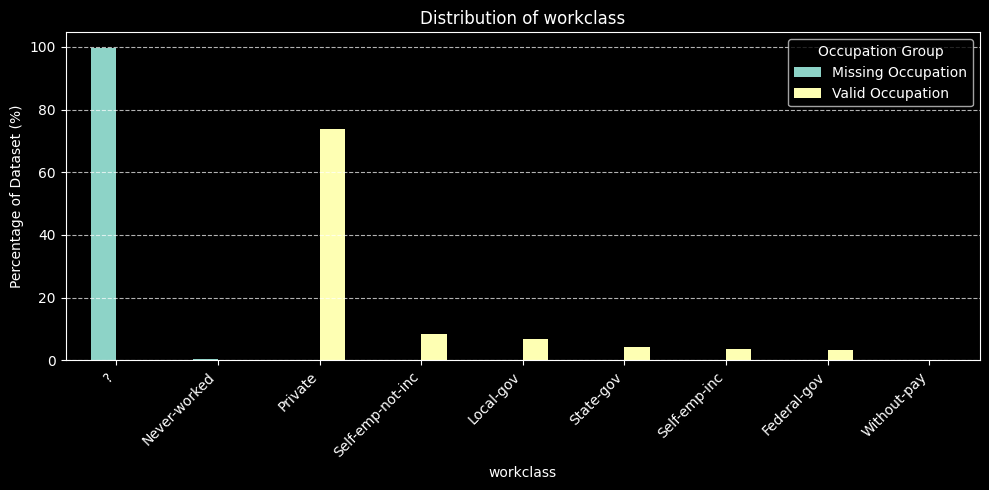

<Figure size 1000x500 with 0 Axes>

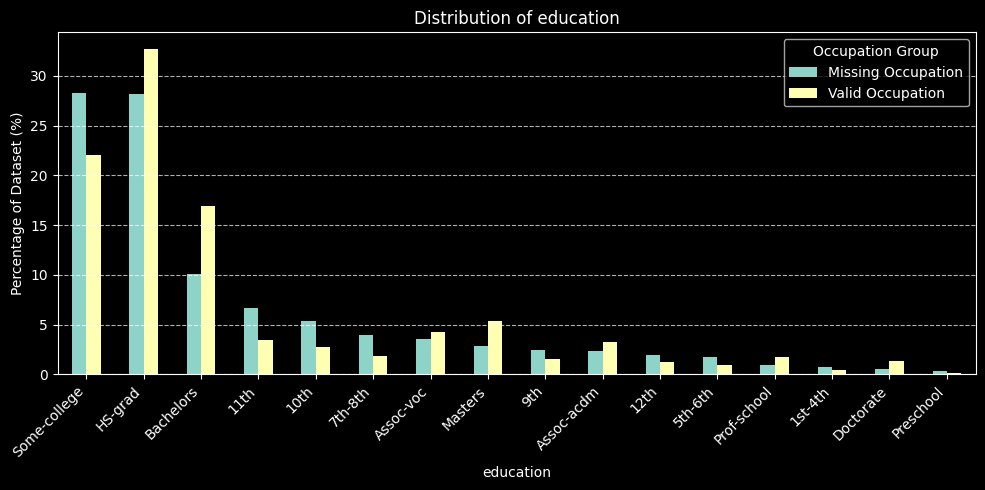

<Figure size 1000x500 with 0 Axes>

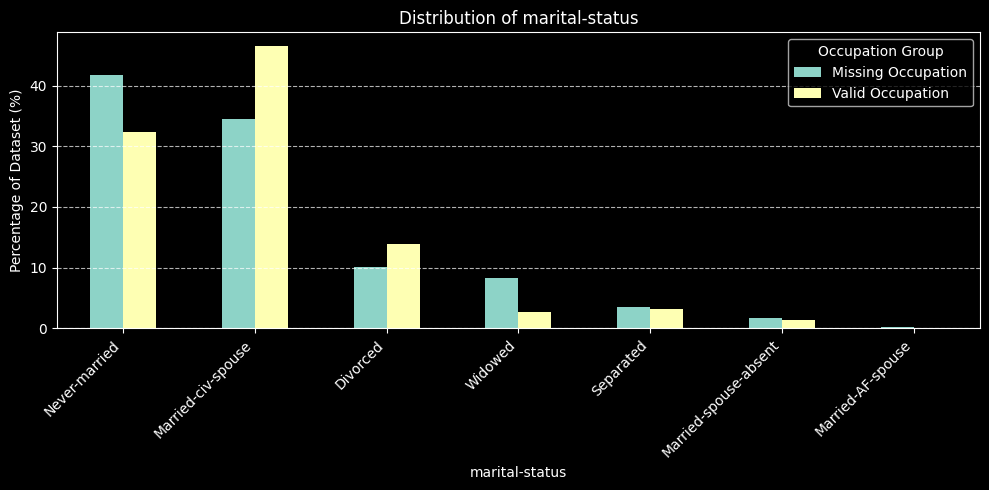

<Figure size 1000x500 with 0 Axes>

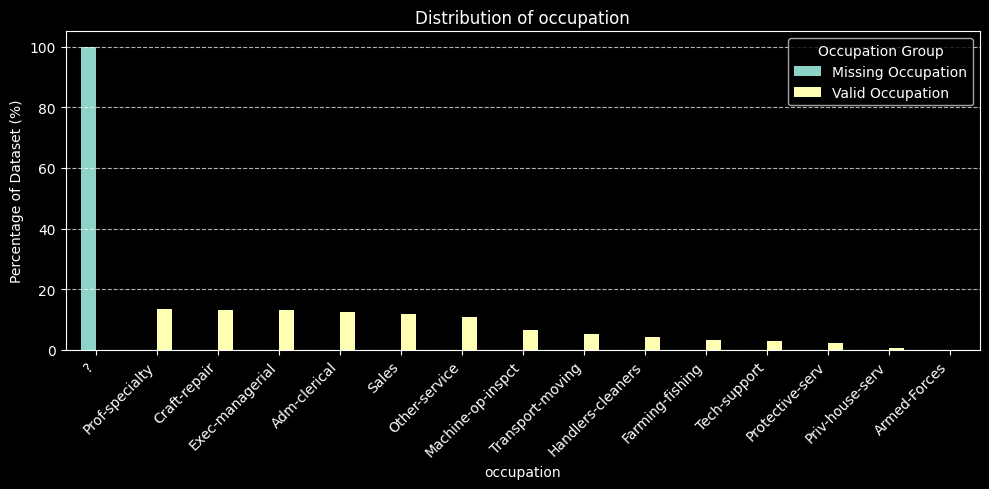

<Figure size 1000x500 with 0 Axes>

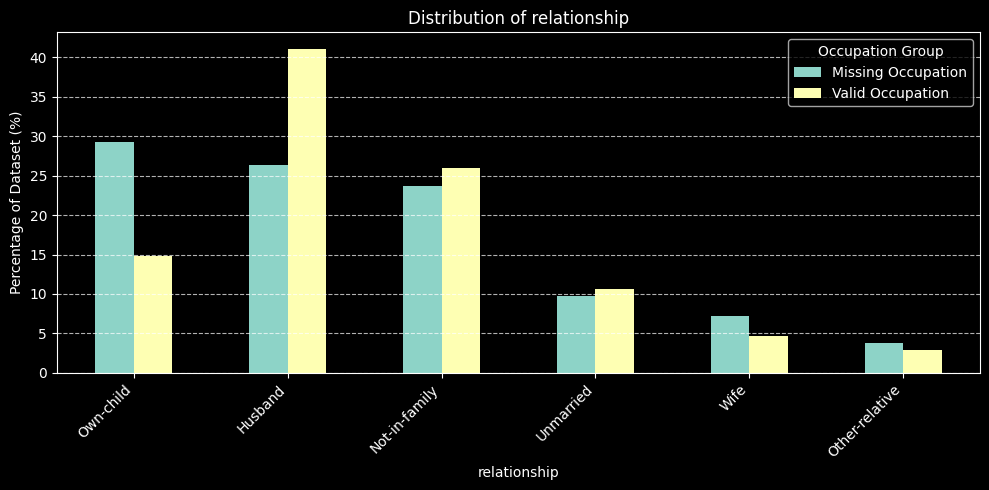

<Figure size 1000x500 with 0 Axes>

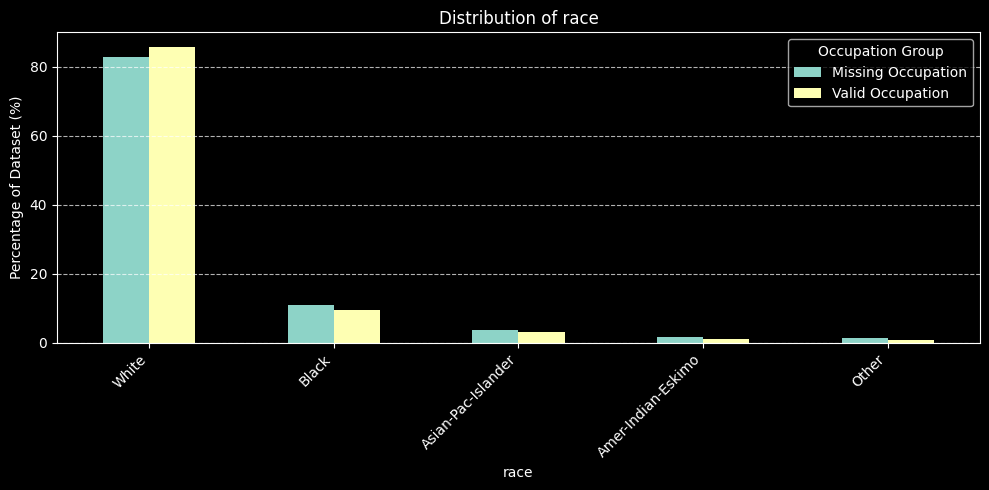

<Figure size 1000x500 with 0 Axes>

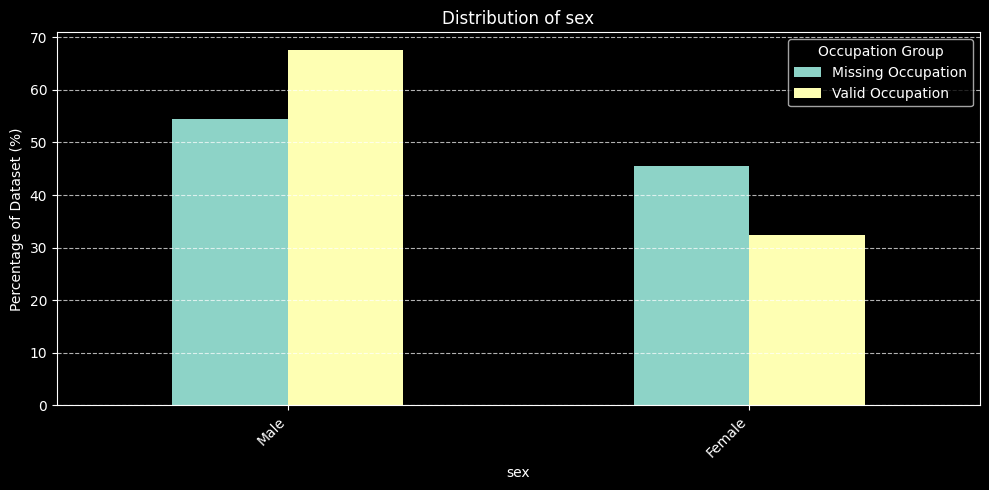

<Figure size 1000x500 with 0 Axes>

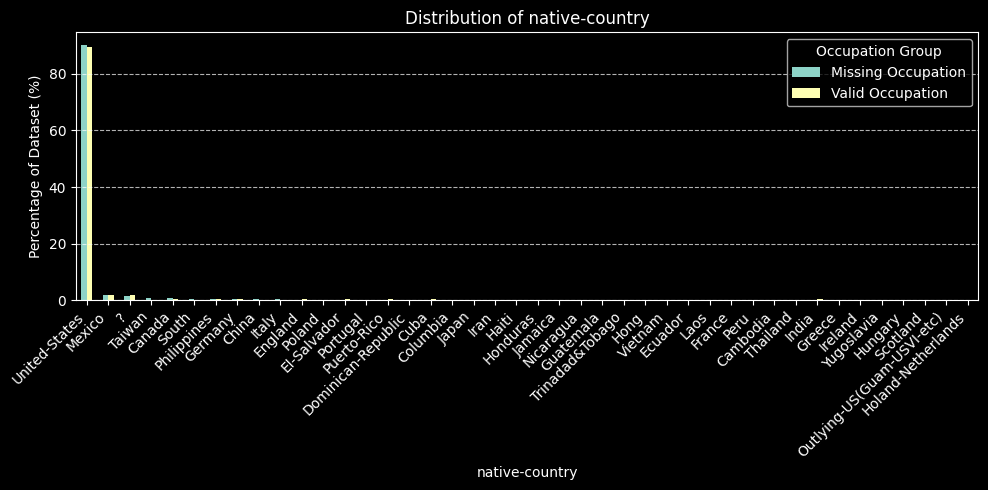

<Figure size 1000x500 with 0 Axes>

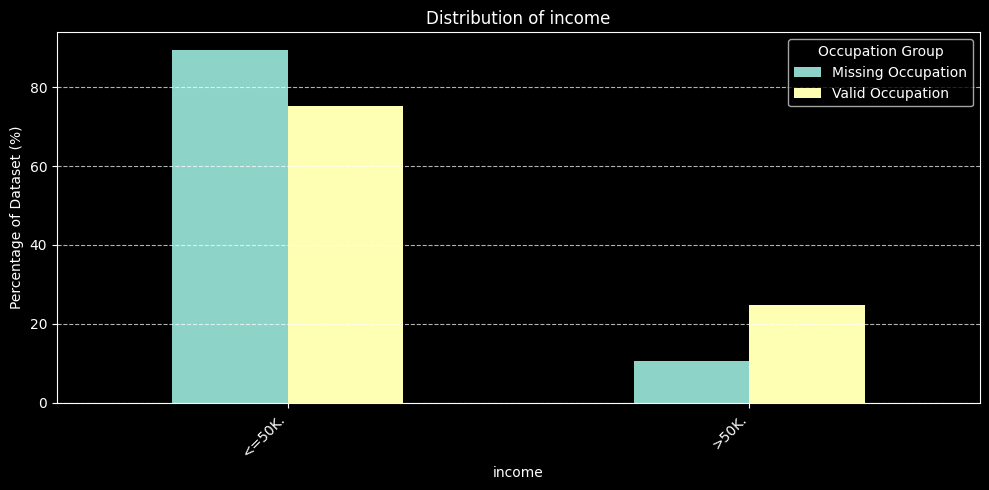

In [ ]:
# Split into two DataFrames
df_missing_occ = train[train['occupation'] == '?']        # Rows with missing occupation
df_valid_occ   = train[train['occupation'] != '?']        # Rows with valid occupation

# Identify non-continuous (categorical) columns
categorical_cols = df_missing_occ.select_dtypes(exclude=['number']).columns

# Plot comparison for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10,5))

    # Normalize to get percentage distributions
    counts_missing = df_missing_occ[col].value_counts(normalize=True) * 100
    counts_valid   = df_valid_occ[col].value_counts(normalize=True) * 100

    # Combine into one DataFrame for aligned plotting
    combined = pd.concat([counts_missing, counts_valid], axis=1, keys=['Missing Occupation', 'Valid Occupation']).fillna(0)

    # Plot as grouped bars
    combined.plot(kind='bar', figsize=(10,5))
    plt.title(f'Distribution of {col}')
    plt.ylabel('Percentage of Dataset (%)')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Occupation Group')
    plt.tight_layout()
    plt.show()

There is some difference in the gender of ? vs non- ?
Income is lower on average
Gender is more female
More own child (big gap of 15% in non-? and 30% in ?)
Higher rates of non marriage in ? (about a 10% higher rate in ?)

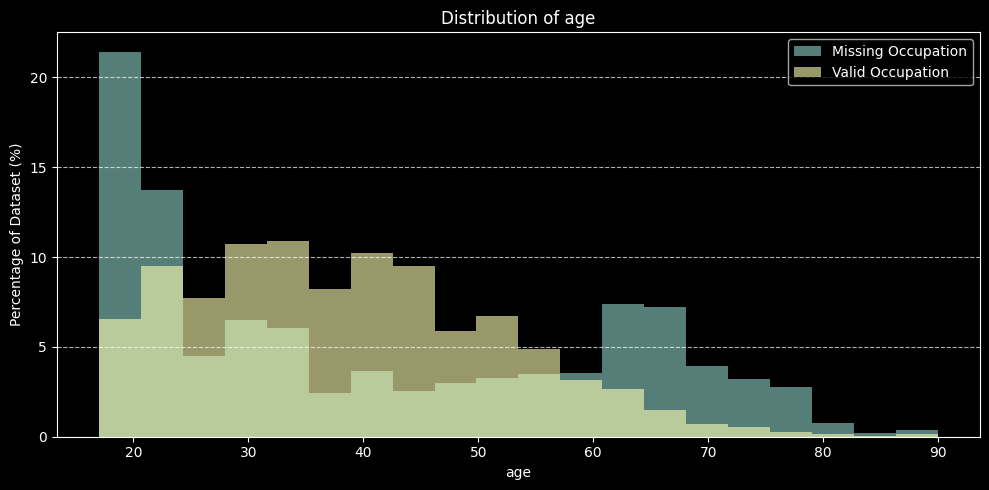

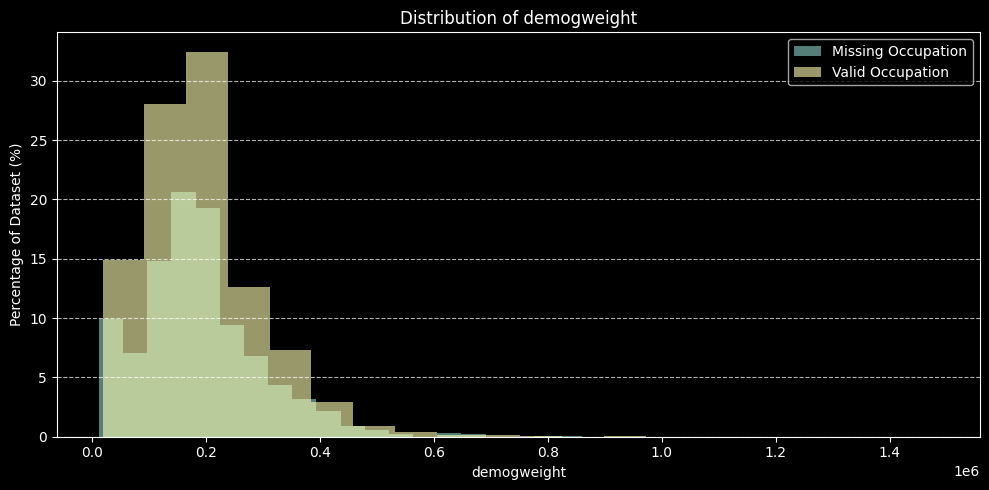

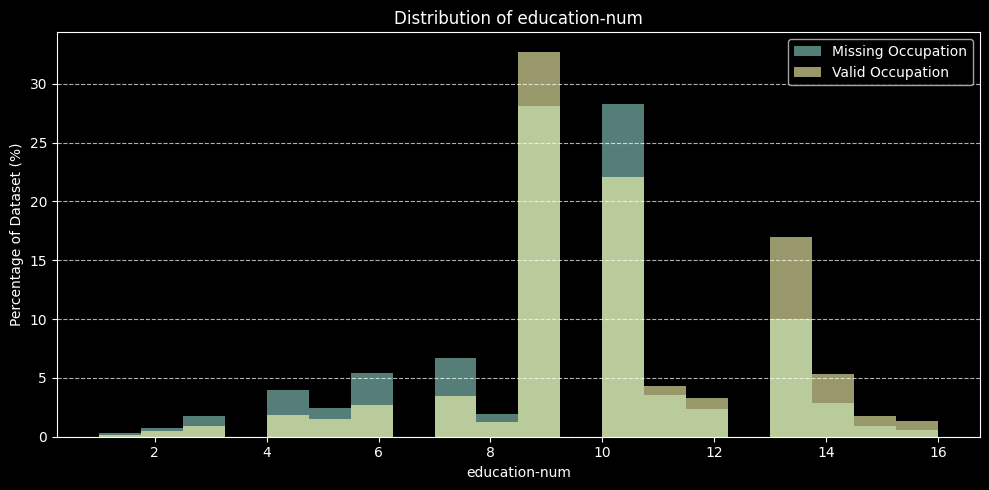

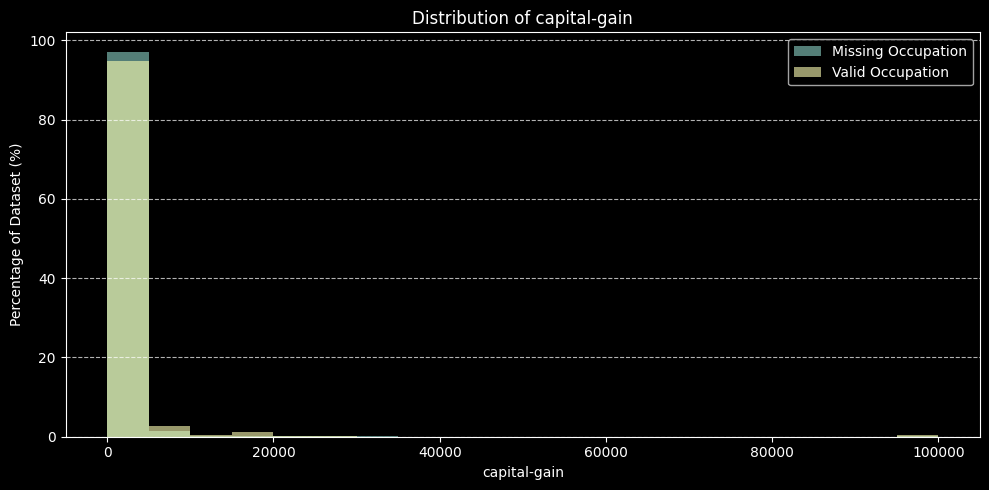

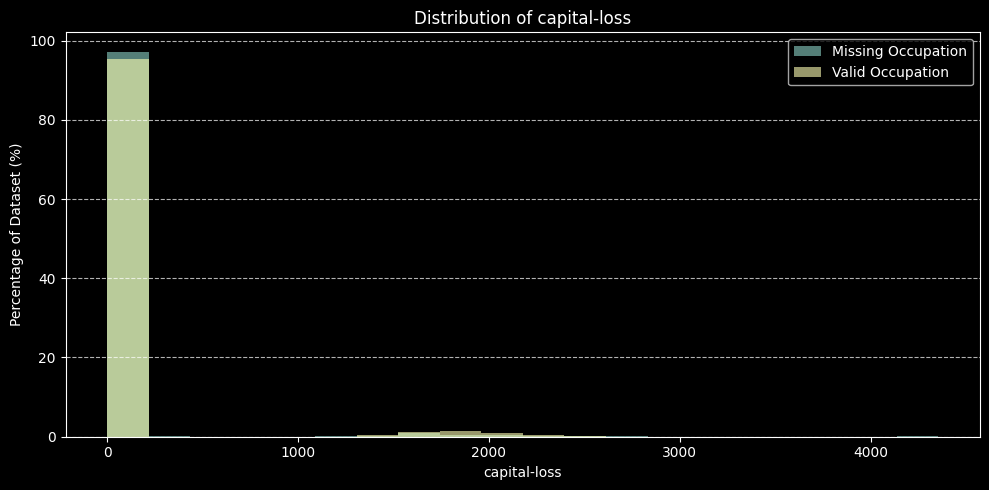

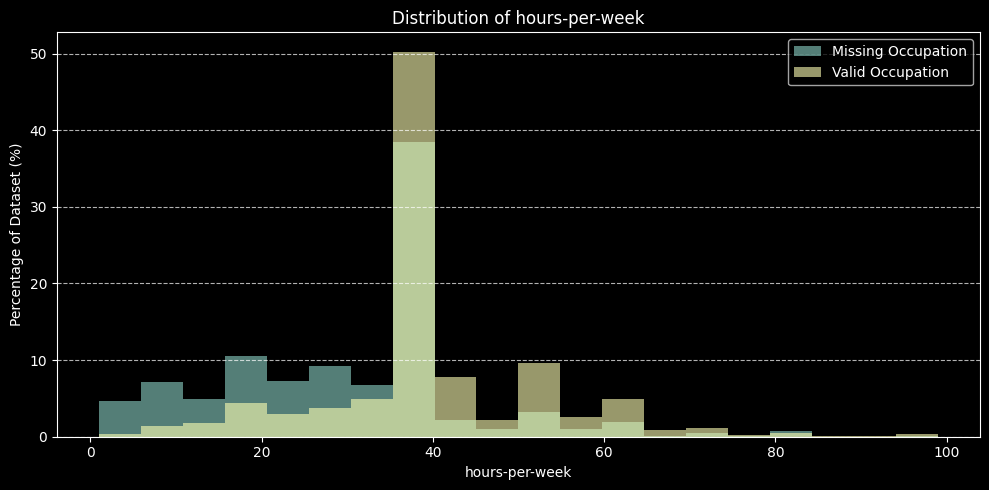

In [ ]:
# Identify continuous (numeric) columns
continuous_cols = df_missing_occ.select_dtypes(include=['number']).columns

# Plot comparison for each continuous column
for col in continuous_cols:
    plt.figure(figsize=(10,5))

    # Plot histograms as percentages
    plt.hist(
        df_missing_occ[col],
        bins=20,
        alpha=0.6,
        label='Missing Occupation',
        weights=[100 / len(df_missing_occ)] * len(df_missing_occ)
    )
    plt.hist(
        df_valid_occ[col],
        bins=20,
        alpha=0.6,
        label='Valid Occupation',
        weights=[100 / len(df_valid_occ)] * len(df_valid_occ)
    )

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage of Dataset (%)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Initialize base neural network (non-custom)
1. Dummary variable (convert to numbers)
2. Normalize
3. K-fold

In [ ]:
train = pd.read_csv('../Data/USCensusTraining.csv')
train_na = train.replace('?', np.nan)
train_na = train_na.drop("education", axis = 1)


train_na['income'] = train_na['income'].replace('<=50K.', 0)
train_na['income'] = train_na['income'].replace('>50K.', 1)

categorical_cols = train_na.select_dtypes(include=['object']).columns

C:\Users\zwoza\AppData\Local\Temp\ipykernel_32328\3293249496.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_na['income'] = train_na['income'].replace('>50K.', 1)


In [ ]:


#for col in categorical_cols:
    #train_na[col] = train_na[col].fillna('Missing')

#for col in categorical_cols:
    #train_na[col].fillna(train_na[col].mode()[0], inplace=True)

# One Hot code
train_na = pd.get_dummies(train_na, columns=categorical_cols)

# split to X and y
X = train_na.drop("income", axis =1)
y = train_na["income"]

In [ ]:
# indicate imbalance in the response
np.bincount(y)

array([19016,  5984])

In [ ]:
# remove the outliers
iso = IsolationForest(contamination=0.05, random_state=42)
yhat = iso.fit_predict(X)

# -1 mean outlier
mask = yhat != -1
X_clean = X[mask]
y_clean = y[mask]

print("Original shape:", X.shape)
print("After removing outliers:", X_clean.shape)

Original shape: (25000, 89)
After removing outliers: (23750, 89)


In [ ]:
# standardize between 0 and 1
scaler = preprocessing.MinMaxScaler().fit(X_clean)
X_scaled = scaler.transform(X_clean)

#scaler = preprocessing.MinMaxScaler().fit(X_train)

#X_train_scaled = scaler.transform(X_train)

#X_val_scaled = scaler.transform(X_val)

In [ ]:
# train test splits
X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_scaled, y_clean,
                                                                test_size=0.2,
                                                                random_state=42
                                                                )

# use KNN to infer the missing value
imputer = KNNImputer(n_neighbors=5)
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_val_scaled = imputer.fit_transform(X_val_scaled)

In [ ]:
model = Sequential(name = "IncomeANN")

model.add(Input(shape = (X_train_scaled.shape[1],), name = 'input_features'))

model.add(Dense(32, activation = "sigmoid", kernel_initializer = "glorot_uniform", name = "hidden"))

model.add(Dense(1, activation = 'sigmoid', name = "output"))

model.compile(optimizer = RMSprop(learning_rate = 1e-3),
              loss = 'binary_crossentropy',
              metrics = ["accuracy"])

In [ ]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs = 50, batch_size = 32, verbose = 2)

Epoch 1/50
594/594 - 1s - 2ms/step - accuracy: 0.7640 - loss: 0.4705 - val_accuracy: 0.8211 - val_loss: 0.3822
Epoch 2/50
594/594 - 0s - 834us/step - accuracy: 0.8188 - loss: 0.3850 - val_accuracy: 0.8333 - val_loss: 0.3579
Epoch 3/50
594/594 - 0s - 828us/step - accuracy: 0.8240 - loss: 0.3714 - val_accuracy: 0.8411 - val_loss: 0.3491
Epoch 4/50
594/594 - 0s - 837us/step - accuracy: 0.8265 - loss: 0.3646 - val_accuracy: 0.8423 - val_loss: 0.3435
Epoch 5/50
594/594 - 1s - 842us/step - accuracy: 0.8298 - loss: 0.3596 - val_accuracy: 0.8455 - val_loss: 0.3392
Epoch 6/50
594/594 - 0s - 831us/step - accuracy: 0.8319 - loss: 0.3553 - val_accuracy: 0.8474 - val_loss: 0.3354
Epoch 7/50
594/594 - 0s - 836us/step - accuracy: 0.8328 - loss: 0.3516 - val_accuracy: 0.8497 - val_loss: 0.3321
Epoch 8/50
594/594 - 1s - 847us/step - accuracy: 0.8341 - loss: 0.3483 - val_accuracy: 0.8495 - val_loss: 0.3292
Epoch 9/50
594/594 - 1s - 844us/step - accuracy: 0.8355 - loss: 0.3454 - val_accuracy: 0.8501 - va

In [ ]:
predictions = model.predict(X_val_scaled)
print(predictions)

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
[[6.2759919e-04]
 [8.4494668e-01]
 [7.4380553e-01]
 ...
 [1.8610012e-02]
 [3.7649490e-02]
 [1.8516779e-03]]


In [ ]:
rounded = [round(x[0]) for x in predictions]
print(rounded)

[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

In [ ]:
model.summary()

Model: "IncomeANN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 32)             │         2,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,828 (22.77 KB)

 Trainable params: 2,913 (11.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,915 (11.39 KB)

In [ ]:
val_loss, val_acc = model.evaluate(X_val_scaled, y_val)
print(f"Validation Accuracy: {val_acc:.4f}")


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.8564 - loss: 0.3098
Validation Accuracy: 0.8564


In [ ]:
X_mean = X_val_scaled.mean(axis=0)
X_min = X_val_scaled.min(axis=0)
X_max = X_val_scaled.max(axis=0)

base_pred = model.predict(X_mean.reshape(1, -1), verbose=0)[0][0]

print("\nSensitivity Sweep (min→max change):")
sensitivity_results = []

for i, name in enumerate(X.columns):
    x_low = X_mean.copy()
    x_high = X_mean.copy()
    x_low[i] = X_min[i]
    x_high[i] = X_max[i]

    out_low = model.predict(x_low.reshape(1, -1), verbose=0)[0][0]
    out_high = model.predict(x_high.reshape(1, -1), verbose=0)[0][0]

    delta = out_high - out_low
    abs_delta = abs(delta)

    sensitivity_results.append((name, out_low, out_high, delta, abs_delta))


    print(f"{name}: output(min)={out_low:.4f}, output(max)={out_high:.4f}, Δ={delta:.4f}")


sensitivity_results_sorted = sorted(sensitivity_results, key=lambda x: x[4], reverse=True)

print("\nTop 5 Most Sensitive Features:")
for name, out_low, out_high, delta, abs_delta in sensitivity_results_sorted[:5]:
    print(f"{name}: |Δ| = {abs_delta:.4f}")

max_feature = sensitivity_results_sorted[0]
print(f"\nMost sensitive feature overall: {max_feature[0]} (|Δ| = {max_feature[4]:.4f})")


Sensitivity Sweep (min→max change):
age: output(min)=0.0509, output(max)=0.3620, Δ=0.3110
demogweight: output(min)=0.0925, output(max)=0.2760, Δ=0.1834
education-num: output(min)=0.0099, output(max)=0.4098, Δ=0.3999
capital-gain: output(min)=0.0865, output(max)=0.9999, Δ=0.9134
capital-loss: output(min)=0.1021, output(max)=0.3806, Δ=0.2786
hours-per-week: output(min)=0.0283, output(max)=0.4759, Δ=0.4476
workclass_Federal-gov: output(min)=0.1025, output(max)=0.4284, Δ=0.3259
workclass_Local-gov: output(min)=0.1019, output(max)=0.1993, Δ=0.0974
workclass_Never-worked: output(min)=0.1060, output(max)=0.1060, Δ=0.0000
workclass_Private: output(min)=0.0466, output(max)=0.1453, Δ=0.0987
workclass_Self-emp-inc: output(min)=0.1028, output(max)=0.3026, Δ=0.1998
workclass_Self-emp-not-inc: output(min)=0.0970, output(max)=0.2601, Δ=0.1631
workclass_State-gov: output(min)=0.1038, output(max)=0.1845, Δ=0.0807
workclass_Without-pay: output(min)=0.1060, output(max)=0.0598, Δ=-0.0462
marital-status_D

In [ ]:
y_pred_prob = model.predict(X_val_scaled, verbose=0).flatten()
y_pred = (y_pred_prob >= 0.5).astype(int)

test_acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred_prob)
cm = confusion_matrix(y_val, y_pred)

print(f"Best Parameters: {{'hidden_layer_sizes': (50,)}}")
print(f"Test Accuracy: {test_acc:.4f}\n")
print("Confusion Matrix:")
print(cm)
print(f"\nPrecision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")

Best Parameters: {'hidden_layer_sizes': (50,)}
Test Accuracy: 0.8564

Confusion Matrix:
[[3390  230]
 [ 452  678]]

Precision: 0.7467
Recall: 0.6000
F1 Score: 0.6654
AUC-ROC: 0.9125


In [ ]:
%pip install shap
import shap
shap.initjs()

%matplotlib inline
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [ ]:
explainer = shap.Explainer(model,X_train_scaled) # One Explainer
shap_values = explainer.shap_values(X_val_scaled)

PermutationExplainer explainer: 4751it [03:22, 22.85it/s]                          


In [ ]:
shap_values1 = explainer(X_val_scaled)

PermutationExplainer explainer:  59%|█████▊    | 2788/4750 [01:03<00:43, 44.64it/s]

In [ ]:
shap_values

array([[-0.03487618, -0.00186162, -0.04882211, ...,  0.00015852,
         0.        ,  0.        ],
       [ 0.03397786, -0.00529665,  0.10188019, ...,  0.00058087,
         0.        ,  0.        ],
       [ 0.06242047, -0.00915946,  0.0701836 , ...,  0.00061752,
         0.        ,  0.        ],
       ...,
       [-0.02270724, -0.00606931,  0.03247815, ...,  0.00026085,
         0.        ,  0.        ],
       [-0.06520579, -0.00654337, -0.10128519, ..., -0.01808084,
         0.        ,  0.        ],
       [-0.01702342,  0.00384234, -0.03821551, ...,  0.00017184,
         0.        ,  0.        ]])

In [ ]:
shap_values1.values

array([[-0.0345593 , -0.00172205, -0.05029018, ...,  0.00012468,
         0.        ,  0.        ],
       [ 0.033521  , -0.00632843,  0.10905698, ...,  0.00058041,
         0.        ,  0.        ],
       [ 0.06661546, -0.00859799,  0.06991097, ...,  0.00053393,
         0.        ,  0.        ],
       ...,
       [-0.01634996, -0.00621921,  0.03743567, ...,  0.00035378,
         0.        ,  0.        ],
       [-0.05207264, -0.00546573, -0.09203409, ..., -0.0221703 ,
         0.        ,  0.        ],
       [-0.01851874,  0.00340794, -0.03602695, ...,  0.00018857,
         0.        ,  0.        ]])

In [ ]:
shap_values1.base_values

array([[0.28719346],
       [0.28719346],
       [0.28719346],
       ...,
       [0.28719346],
       [0.28719346],
       [0.28719346]])

In [ ]:
shap_values1.data

array([[0.        , 0.08840684, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.45205479, 0.07868543, 0.8       , ..., 1.        , 0.        ,
        0.        ],
       [0.56164384, 0.06270493, 0.73333333, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.21917808, 0.05817226, 0.73333333, ..., 1.        , 0.        ,
        0.        ],
       [0.02739726, 0.06632143, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.20547945, 0.16577199, 0.46666667, ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
shap_values1.feature_names

['age',
 'demogweight',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'marital-status_Divorced',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',
 'occupation_Sales',
 'occupation_Tech-support',
 'occupation_Transport-moving',
 'relationship_Husband',
 'relationship_Not-in-fami

# Create the beeswarm Plot for X_validation Set

C:\Users\wkq02\AppData\Local\Temp\ipykernel_17788\2923435751.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_val_scaled)


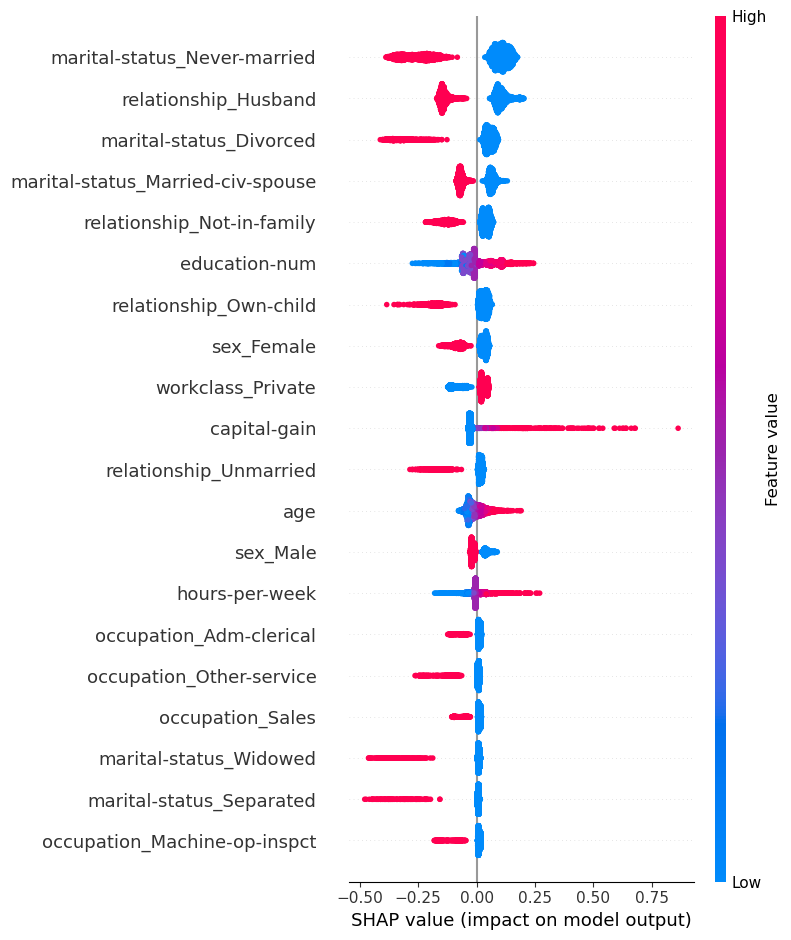

In [ ]:
feature_names= list(X_val_scaled.columns)
shap.summary_plot(shap_values, X_val_scaled)
plt.show()

## Create Global Importance Display on Input Features

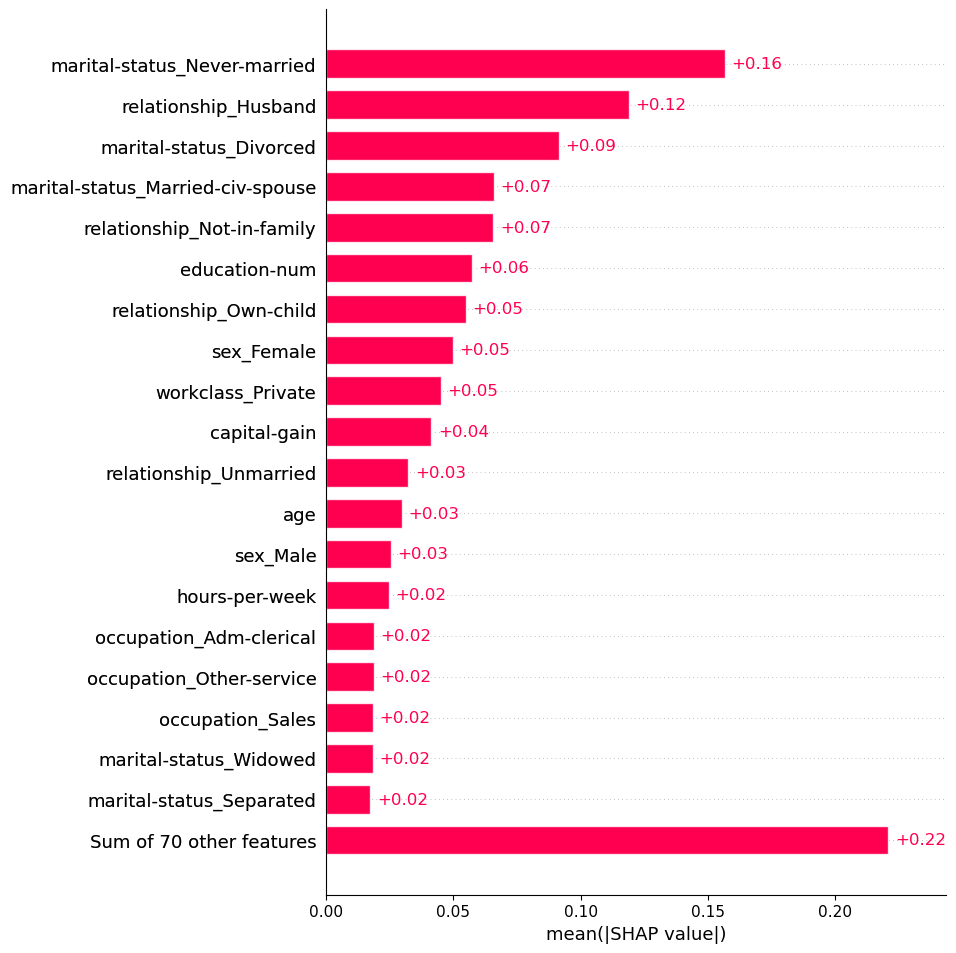

In [ ]:
shap.plots.bar(shap_values1, max_display=20)

## Create Dependence Plots for Occupations Catergorical Variable Analysis (All Negative Correlations)

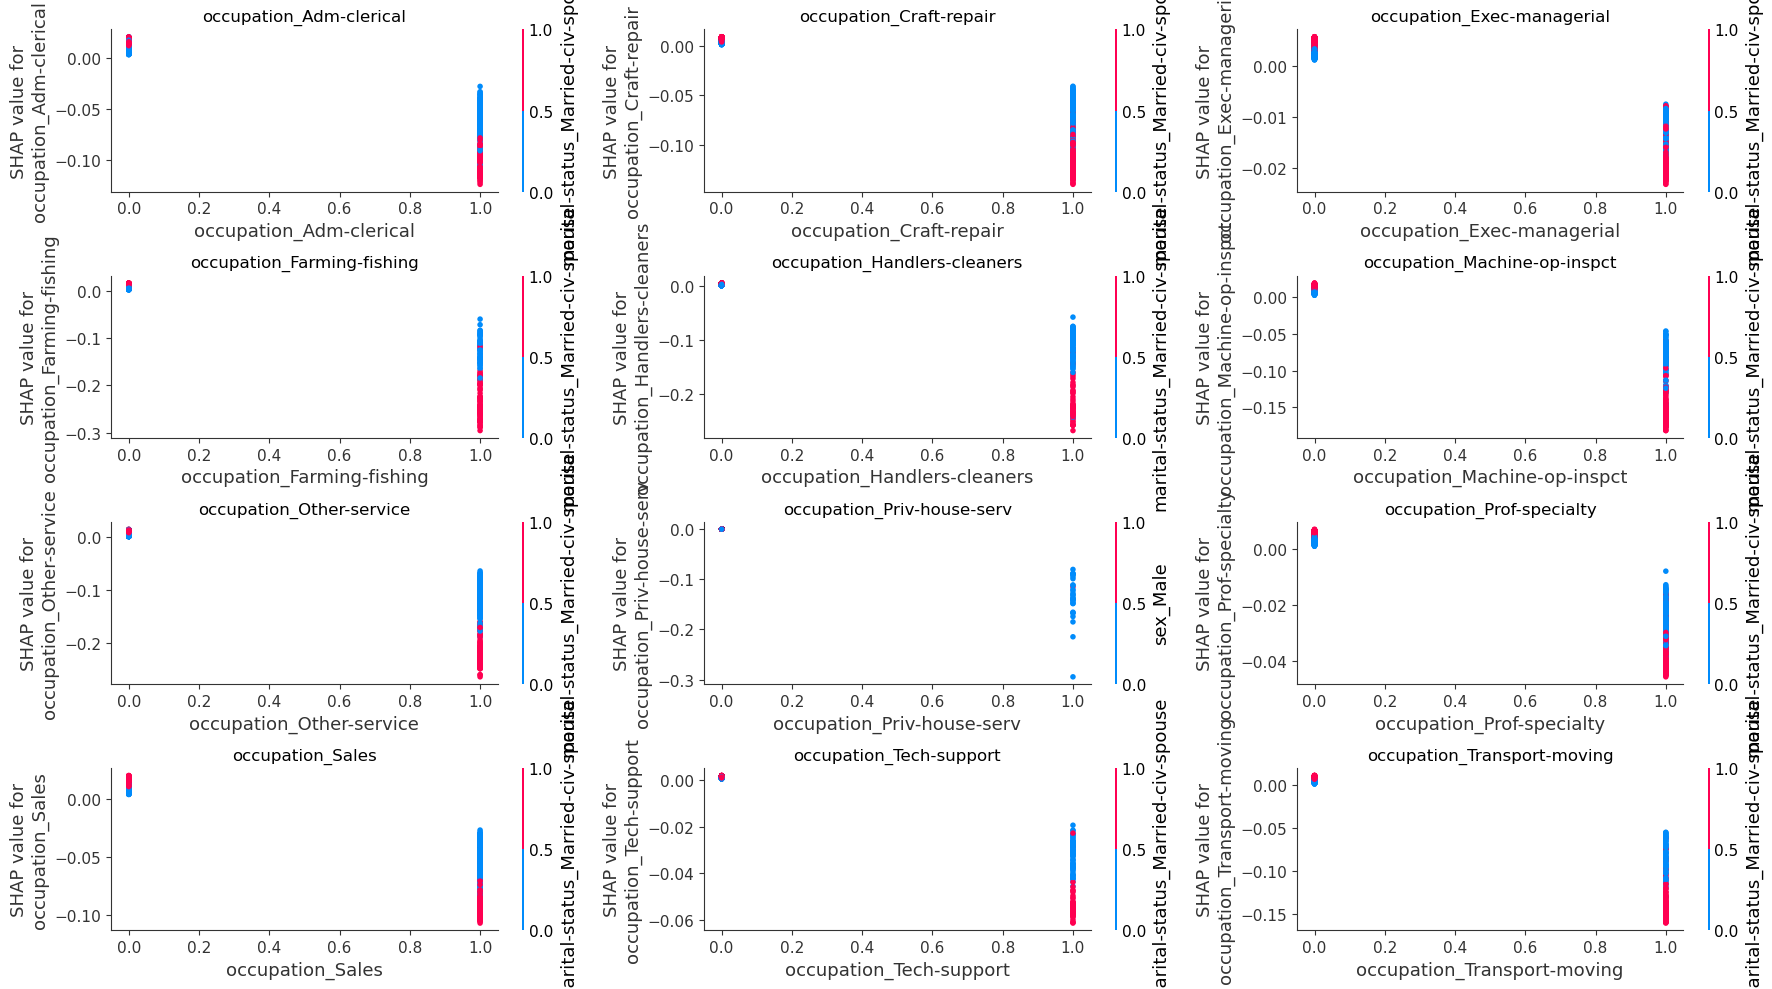

In [ ]:
import shap
import matplotlib.pyplot as plt

# Features to visualize
features = [
    "occupation_Adm-clerical",
    #"occupation_Armead-Forces",
    "occupation_Craft-repair",
    "occupation_Exec-managerial",
    "occupation_Farming-fishing",
    "occupation_Handlers-cleaners",
    "occupation_Machine-op-inspct",
    "occupation_Other-service",
    "occupation_Priv-house-serv",
    "occupation_Prof-specialty",
    "occupation_Sales",
    "occupation_Tech-support",
    "occupation_Transport-moving"
]

# Create grid layout
rows, cols = 4, 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 10))
axes = axes.flatten()

# Generate dependence plots
for i, feature in enumerate(features):
    shap.dependence_plot(feature, shap_values, X_val_scaled, ax=axes[i], show=False)
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

## Create Data Visualization for the Relationship on the Top Three Importance Attributes and the Income Level (>50,000)

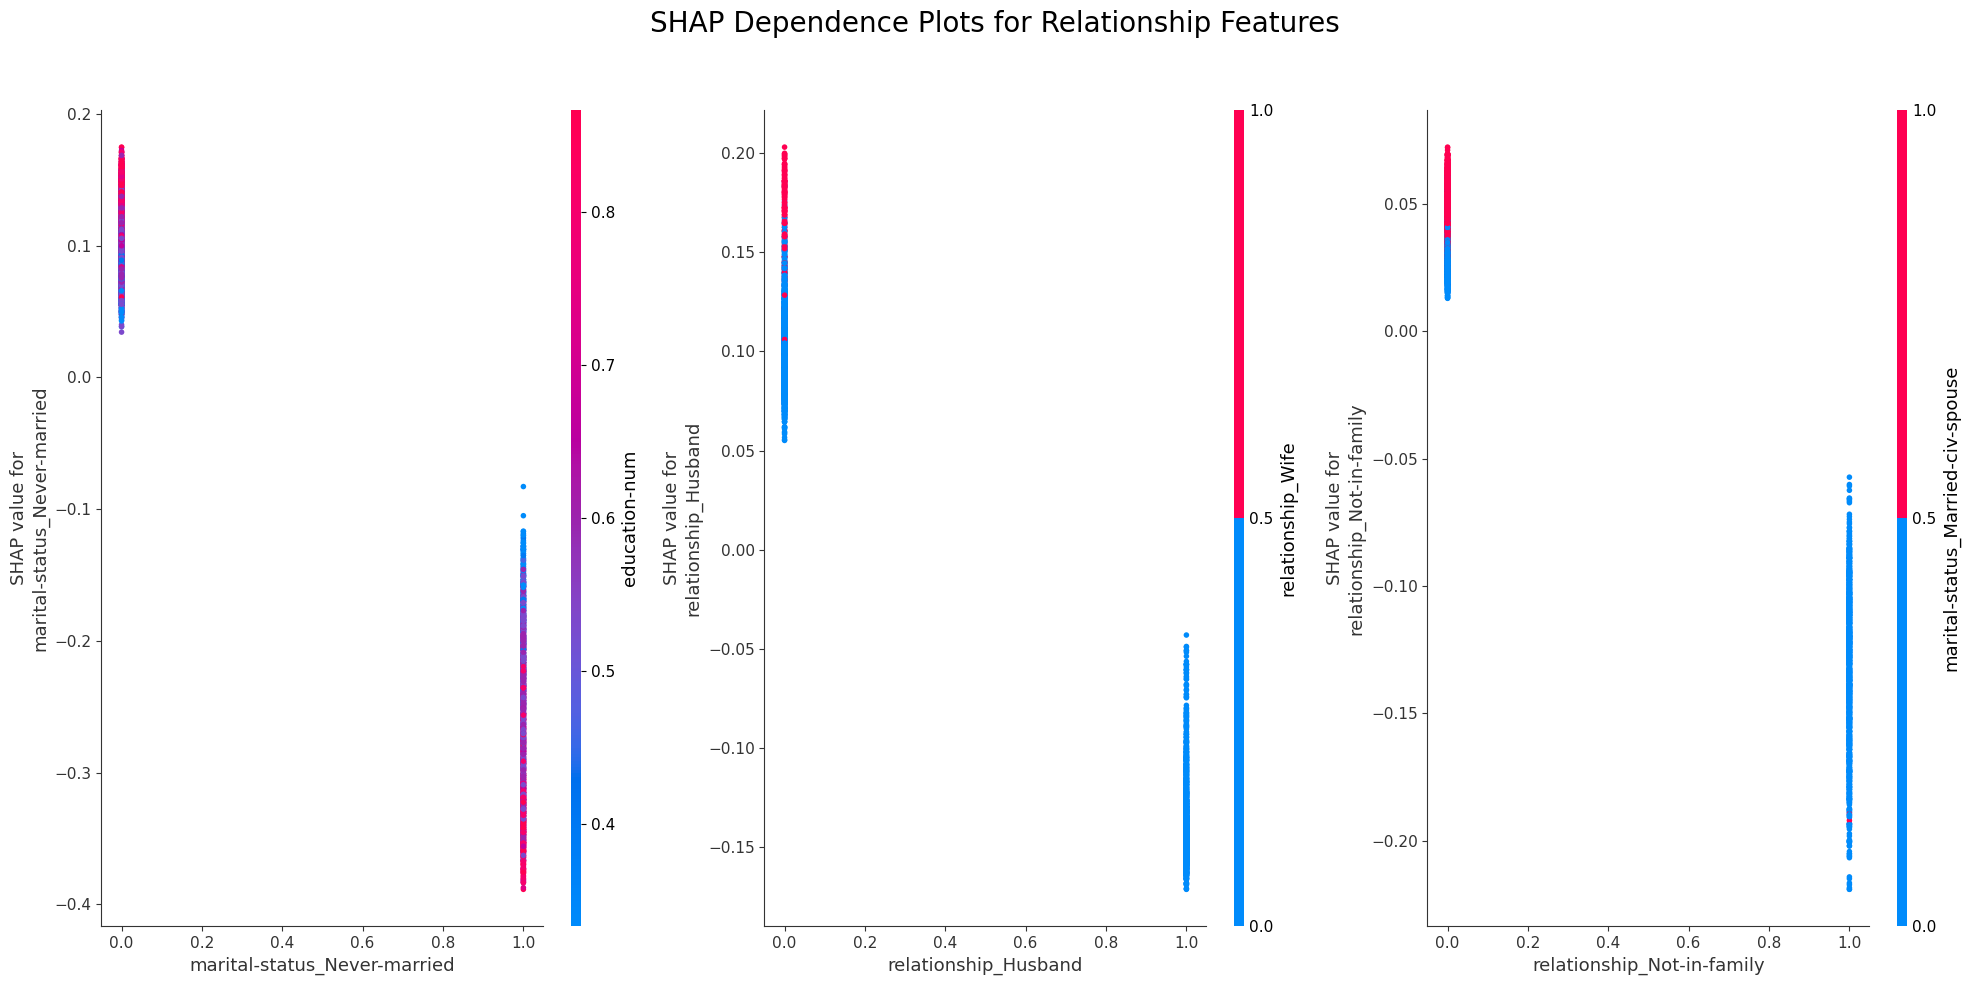

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

shap.dependence_plot(
    "marital-status_Never-married",
    shap_values,
    X_val_scaled,
    ax=axes[0],
    show=False
)
shap.dependence_plot(
    "relationship_Husband",
    shap_values,
    X_val_scaled,
    ax=axes[1],
    show=False
)
shap.dependence_plot(
    "relationship_Not-in-family",
    shap_values,
    X_val_scaled,
    ax=axes[2],
    show=False
)

fig.suptitle("SHAP Dependence Plots for Relationship Features", fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.88, wspace=0.2)
plt.show()

## Create the Shap_Value Feature Importance Analysis for the numerical variables education levels and ages

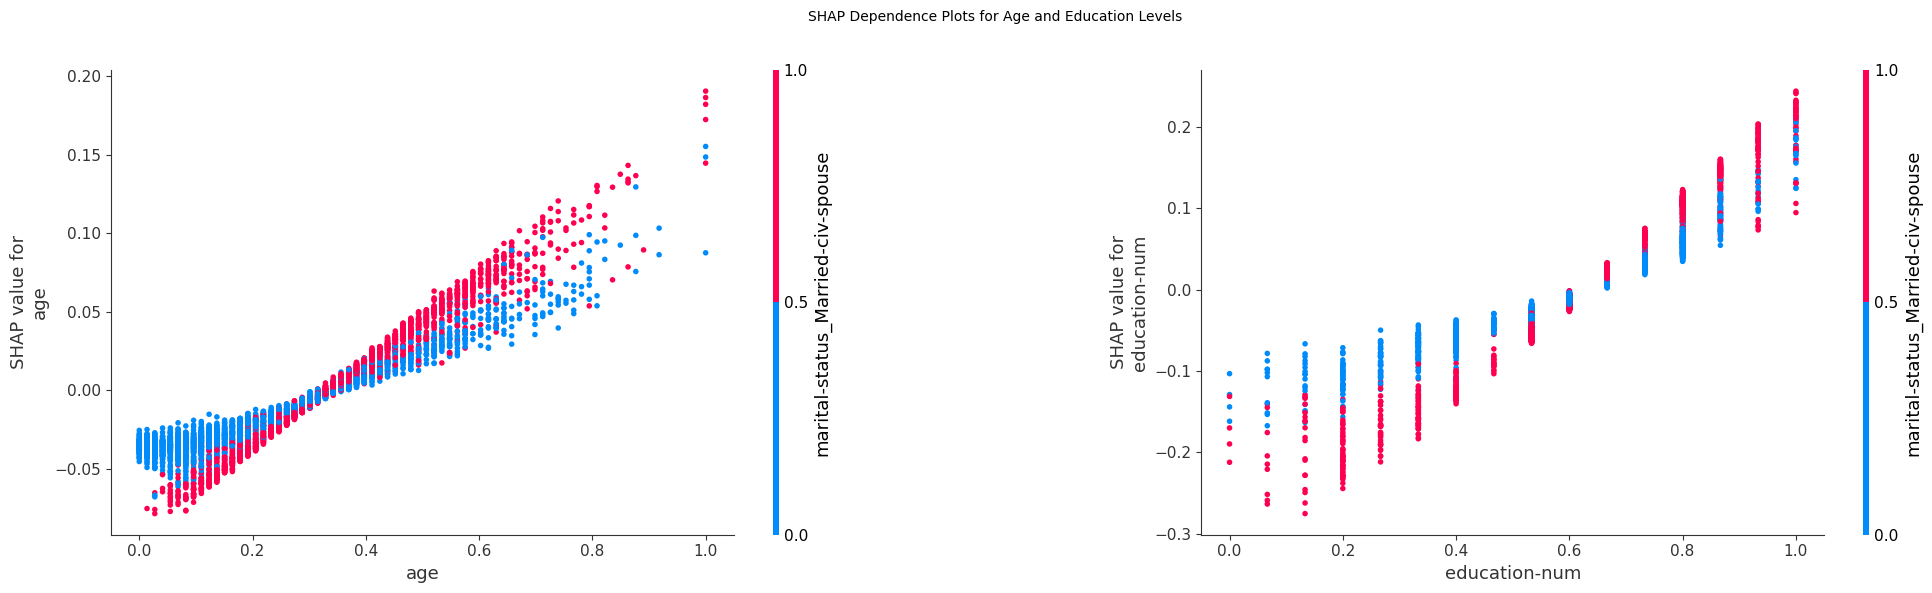

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

plt.subplots_adjust(wspace=0.4)
# Create the first dependence plot on the left subplot
shap.dependence_plot(
    "age",
    shap_values,
    X_val_scaled,
    ax=axes[0],
    show=False
)

# Create the second dependence plot on the right subplot
shap.dependence_plot(
    "education-num",
    shap_values,
    X_val_scaled,
    ax=axes[1],
    show=False
)

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()


fig.suptitle("SHAP Dependence Plots for Age and Education Levels", fontsize=10)
plt.tight_layout()
plt.subplots_adjust(top=0.88, wspace=0.4)
plt.show()
# Display the plots
plt.show()


## Create Shap_Value Plot heatmap:

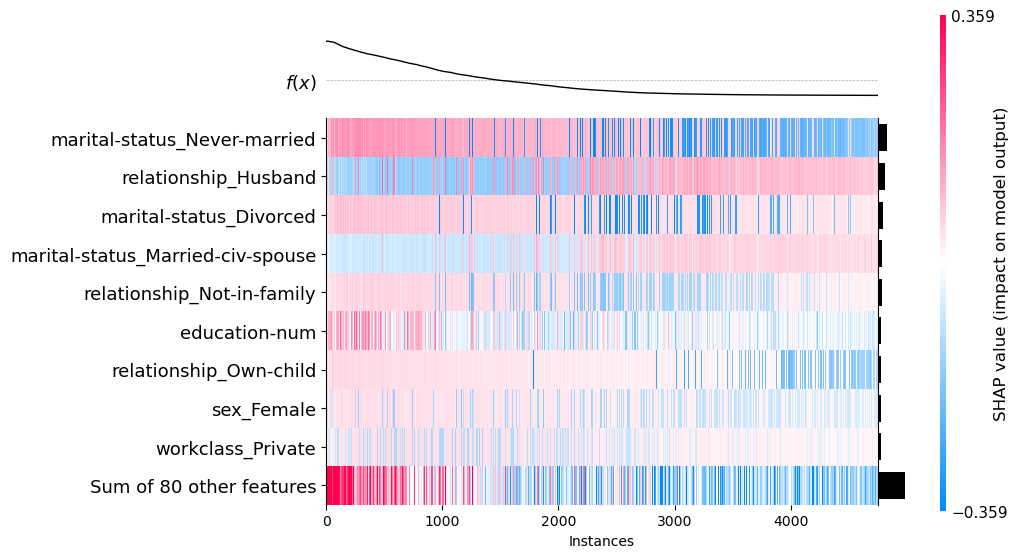

<Axes: xlabel='Instances'>

In [ ]:
shap.plots.heatmap(shap_values1, instance_order=shap_values1.sum(1))

## Additionals: Four Instances PartitionExplainer Local Analysis:

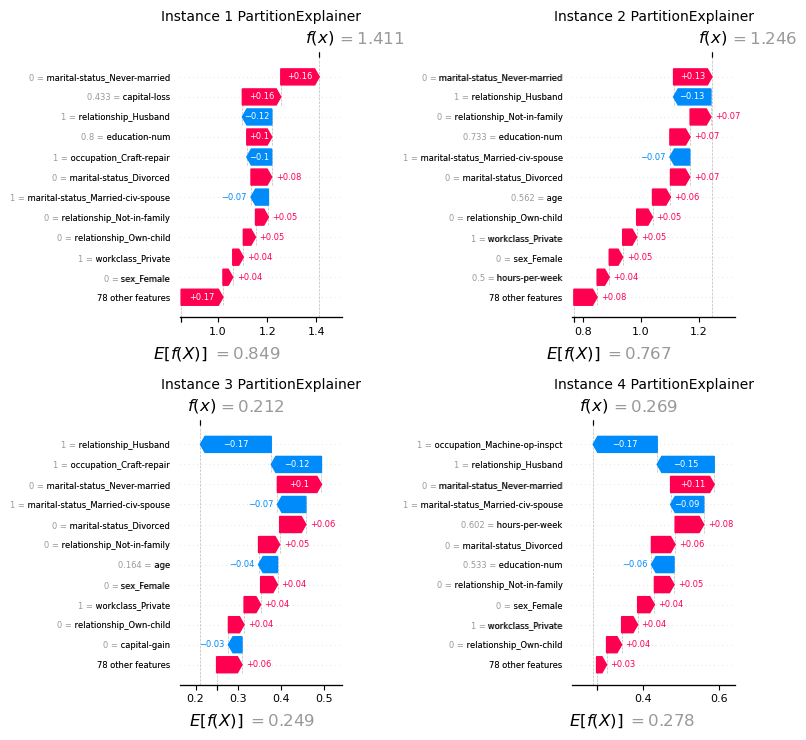

In [ ]:
import shap
import matplotlib.pyplot as plt

instances = [1, 2, 3, 4]

fig, axes = plt.subplots(2, 2, figsize=(14, 20))
axes = axes.flatten()

for i, idx in enumerate(instances):
    explanation = shap.Explanation(
        values=shap_values[idx],
        base_values=predictions[idx],
        data=X_val_scaled.iloc[idx],
        feature_names=feature_names
    )

    plt.sca(axes[i])
    shap.plots.waterfall(explanation, max_display=12, show=False)


    axes[i].set_title(f"Instance {idx} PartitionExplainer", fontsize=10)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=6)


    for text in axes[i].texts:
        text.set_fontsize(6)

plt.tight_layout()
plt.show()

# f. Construct Normalized Staked histograms for the important and not important numeric variables

In [ ]:
incom_ed_T = train[train["income"] == ">50K."]["education-num"]
incom_ed_F = train[train["income"] == "<=50K."]["education-num"]

In [ ]:
n, bins, patches = plt.hist([incom_ed_T, incom_ed_F], bins=10, stacked=True)

In [ ]:
n[1] = n[1] - n[0]
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1)[:, None]
ourbins = np.column_stack((bins[0:10], bins[1:11]))

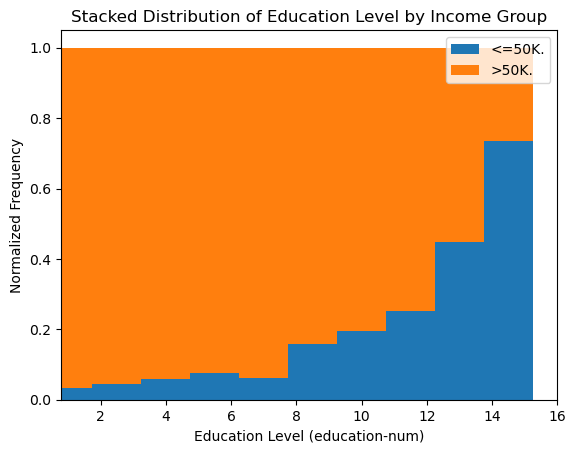

In [ ]:
plt.bar(
    x=ourbins[:, 0],
    height=n_norm[:, 0],
    width=ourbins[:, 1] - ourbins[:, 0],
    label="<=50K."
)

plt.bar(
    x=ourbins[:, 0],
    height=n_norm[:, 1],
    width=ourbins[:, 1] - ourbins[:, 0],
    bottom=n_norm[:, 0],
    label=">50K."
)

x_min = min(min(incom_ed_T), 0.8 * min(incom_ed_F))
x_max = max(max(incom_ed_T), 1.0 * max(incom_ed_F))
plt.xlim(x_min, x_max)

plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Education Level (education-num)")
plt.ylabel("Normalized Frequency")
plt.legend()
plt.title("Stacked Distribution of Education Level by Income Group")

plt.show()

In [ ]:
incom_ed_T = train[train["income"] == ">50K."]["demogweight"]
incom_ed_F = train[train["income"] == "<=50K."]["demogweight"]

In [ ]:
n, bins, patches = plt.hist([incom_ed_T, incom_ed_F], bins=10, stacked=True)

In [ ]:
n[1] = n[1] - n[0]
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1)[:, None]
ourbins = np.column_stack((bins[0:10], bins[1:11]))

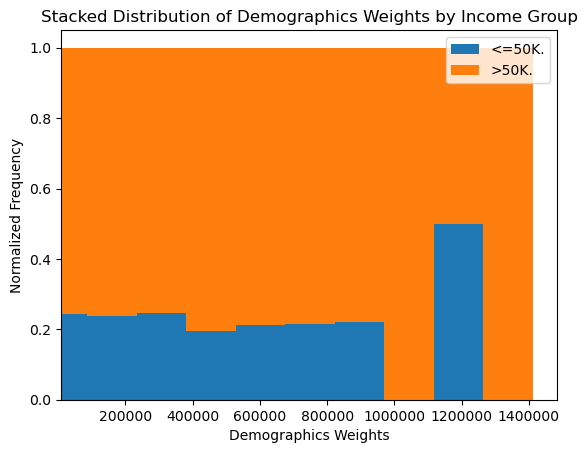

In [ ]:
plt.bar(
    x=ourbins[:, 0],
    height=n_norm[:, 0],
    width=ourbins[:, 1] - ourbins[:, 0],
    label="<=50K."
)

plt.bar(
    x=ourbins[:, 0],
    height=n_norm[:, 1],
    width=ourbins[:, 1] - ourbins[:, 0],
    bottom=n_norm[:, 0],
    label=">50K."
)


x_min = min(min(incom_ed_T), 0.8 * min(incom_ed_F))
x_max = max(max(incom_ed_T), 1.0 * max(incom_ed_F))
plt.xlim(x_min, x_max)

plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Demographics Weights")
plt.ylabel("Normalized Frequency")
plt.legend()
plt.title("Stacked Distribution of Demographics Weights by Income Group")

plt.show()

### Tuning

In [ ]:
# test the learning rate dynamicly
lr_schedule = ReduceLROnPlateau(
    monitor='loss',
    factor=0.3,
    patience=5,
    min_lr=1e-6,
    verbose=1,
    restore_best_weights=True

)


def build_model(hp):
    model = Sequential(name="TunedIncomeANN")
    model.add(Input(shape=(X_train_scaled.shape[1],)))

    units_1 = hp.Int('units_1', min_value=32, max_value=256, step=32)
    model.add(Dense(units_1, activation='relu', kernel_initializer='glorot_uniform'))
    model.add(Dropout(hp.Choice('dropout_1', [0.2, 0.3, 0.4]))) #drop out % of the connections to prevent overfitting

    # 第二层是optional的
    if hp.Boolean('add_second_layer'):
        units_2 = hp.Int('units_2', min_value=32, max_value=256, step=32)
        model.add(Dense(units_2, activation='relu', kernel_initializer='glorot_uniform'))
        model.add(Dropout(hp.Choice('dropout_2', [0.2, 0.3, 0.4])))

    model.add(Dense(1, activation='sigmoid'))

    lr = hp.Choice('lr', [1e-2, 5e-3, 1e-3])
    model.compile(
        optimizer=RMSprop(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    overwrite=True,
    directory='tuner_results',
    project_name='income_nn_tuning4'
)

# stop early if validation loss won't improve with 5 epochs
stop_early = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=5,
    restore_best_weights=True
)


tuner.search(
    X_train_scaled, y_train,
    epochs=40,
    validation_data=(X_val_scaled, y_val),
    callbacks=[stop_early, lr_schedule],
    verbose=2
)

best_hyperparam = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:")
print(best_hyperparam.values)


best_model = tuner.hypermodel.build(best_hyperparam)

stop_final = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=5,
    restore_best_weights=True
)

history = best_model.fit(
    X_scaled, y_clean,
    epochs=40,
    batch_size=32,
    verbose=2,
    callbacks=[stop_final, lr_schedule]
)




Trial 5 Complete [00h 00m 26s]
val_accuracy: 0.855228066444397

Best val_accuracy So Far: 0.8597192962964376
Total elapsed time: 00h 03m 49s
Best hyperparameters:
{'units_1': 224, 'dropout_1': 0.2, 'add_second_layer': False, 'lr': 0.01}
Epoch 1/40
743/743 - 1s - 1ms/step - accuracy: 0.8241 - loss: 0.3720 - learning_rate: 0.0100
Epoch 2/40
743/743 - 1s - 737us/step - accuracy: 0.8397 - loss: 0.3453 - learning_rate: 0.0100
Epoch 3/40
743/743 - 1s - 743us/step - accuracy: 0.8426 - loss: 0.3396 - learning_rate: 0.0100
Epoch 4/40
743/743 - 1s - 746us/step - accuracy: 0.8444 - loss: 0.3353 - learning_rate: 0.0100
Epoch 5/40
743/743 - 1s - 748us/step - accuracy: 0.8453 - loss: 0.3343 - learning_rate: 0.0100
Epoch 6/40
743/743 - 1s - 744us/step - accuracy: 0.8485 - loss: 0.3320 - learning_rate: 0.0100
Epoch 7/40
743/743 - 1s - 749us/step - accuracy: 0.8477 - loss: 0.3321 - learning_rate: 0.0100
Epoch 8/40
743/743 - 1s - 749us/step - accuracy: 0.8489 - loss: 0.3298 - learning_rate: 0.0100
Epoch

In [ ]:
y_val_pred_prob = best_model.predict(X_val_scaled).flatten()
y_val_pred = (y_val_pred_prob >= 0.5).astype(int)

acc = accuracy_score(y_val, y_val_pred)
prec = precision_score(y_val, y_val_pred)
rec = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
auc = roc_auc_score(y_val, y_val_pred_prob)
cm = confusion_matrix(y_val, y_val_pred)

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step


In [ ]:
thresholds = np.arange(0.1, 0.9, 0.01)
best_thresh, best_acc = 0.5, acc

for t in thresholds:
    y_pred_t = (y_val_pred_prob >= t).astype(int)
    a = accuracy_score(y_val, y_pred_t)
    if a > best_acc:
        best_acc = a
        best_thresh = t

y_val_best = (y_val_pred_prob >= best_thresh).astype(int)
prec_best = precision_score(y_val, y_val_best)
rec_best = recall_score(y_val, y_val_best)
f1_best = f1_score(y_val, y_val_best)
auc_best = roc_auc_score(y_val, y_val_pred_prob)
cm_best = confusion_matrix(y_val, y_val_best)

In [ ]:

print("MODEL PERFORMANCE SUMMARY")
print(f"Best Hyperparameters: {best_hyperparam.values}\n")

print(f"Baseline threshold (0.5):")
print(f"  - Accuracy:  {acc:.4f}")
print(f"  - Precision: {prec:.4f}")
print(f"  - Recall:    {rec:.4f}")
print(f"  - F1 Score:  {f1:.4f}")
print(f"  - AUC:       {auc:.4f}")
print(f"  - Confusion Matrix:\n{cm}")

print("\n Optimized threshold:")
print(f"  - Best Threshold: {best_thresh:.2f}")
print(f"  - Accuracy:  {best_acc:.4f}")
print(f"  - Precision: {prec_best:.4f}")
print(f"  - Recall:    {rec_best:.4f}")
print(f"  - F1 Score:  {f1_best:.4f}")
print(f"  - AUC:       {auc_best:.4f}")
print(f"  - Confusion Matrix:\n{cm_best}")

MODEL PERFORMANCE SUMMARY
Best Hyperparameters: {'units_1': 224, 'dropout_1': 0.2, 'add_second_layer': False, 'lr': 0.01}

Baseline threshold (0.5):
  - Accuracy:  0.8682
  - Precision: 0.8158
  - Recall:    0.5761
  - F1 Score:  0.6753
  - AUC:       0.9233
  - Confusion Matrix:
[[3473  147]
 [ 479  651]]

 Optimized threshold:
  - Best Threshold: 0.39
  - Accuracy:  0.8754
  - Precision: 0.7712
  - Recall:    0.6770
  - F1 Score:  0.7210
  - AUC:       0.9233
  - Confusion Matrix:
[[3393  227]
 [ 365  765]]


In [ ]:
summary_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],
    'Threshold=0.5': [acc, prec, rec, f1, auc],
    f'Threshold={best_thresh:.2f}': [best_acc, prec_best, rec_best, f1_best, auc_best]
})

print("\nPerformance Table:")
print(summary_df)


Performance Table:
      Metric  Threshold=0.5  Threshold=0.39
0   Accuracy       0.868211        0.875368
1  Precision       0.815789        0.771169
2     Recall       0.576106        0.676991
3   F1 Score       0.675311        0.721018
4        AUC       0.923287        0.923287


### Predict test data

In [ ]:
best_model = load_model("best_model1.keras")  # load the model


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             7561 non-null   int64 
 1   workclass       7561 non-null   object
 2   demogweight     7561 non-null   int64 
 3   education       7561 non-null   object
 4   education-num   7561 non-null   int64 
 5   marital-status  7561 non-null   object
 6   occupation      7561 non-null   object
 7   relationship    7561 non-null   object
 8   race            7561 non-null   object
 9   sex             7561 non-null   object
 10  capital-gain    7561 non-null   int64 
 11  capital-loss    7561 non-null   int64 
 12  hours-per-week  7561 non-null   int64 
 13  native-country  7561 non-null   object
dtypes: int64(6), object(8)
memory usage: 827.1+ KB


In [ ]:
# 1) Load test set (same path style you used above)
test = pd.read_csv("../Data/USCensusTest.csv")

# 2) Apply the same preprocessing as training ( '?'→NaN, drop 'education', one-hot + align )
test_na = test.replace('?', np.nan)
if 'education' in test_na.columns:
    test_na = test_na.drop('education', axis=1)

# One-hot on test (no target), then align to training feature columns 'X'
test_na = pd.get_dummies(test_na)
X_test_aligned = test_na.reindex(columns=X.columns, fill_value=0)

# 3) Scale using the scaler that was FIT ON TRAINING (X_clean)
X_test_scaled = scaler.transform(X_test_aligned)

# 4) Predict probabilities with your tuned model
test_prob = best_model.predict(X_test_scaled, verbose=0).flatten()

# 5) Use your best threshold if available; else default to 0.5
threshold = best_thresh if "best_thresh" in globals() else 0.5
test_pred = (test_prob >= threshold).astype(int)

# 6) Hard assertions (safety checks)
assert test_pred.shape[0] == 7561, f"Expected 7561 predictions, got {test_pred.shape[0]}"
assert set(np.unique(test_pred)).issubset({0,1}), "Predictions must be only 0/1"

# 7) Write ASCII file (one number per line, no header), per assignment spec
out_path = "Team4predictions.txt"   # <-- replace X with your team number if required
np.savetxt(out_path, test_pred, fmt="%d")

# 8) Quick confirmation
print(f"Saved {test_pred.size} predictions to {out_path}.")
print("Distribution (0=<=50K, 1=>50K):", dict(zip(*np.unique(test_pred, return_counts=True))))

best_model.summary()

Saved 7561 predictions to Team4predictions.txt.
Distribution (0=<=50K, 1=>50K): {np.int64(0): np.int64(5917), np.int64(1): np.int64(1644)}


Model: "TunedIncomeANN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 192)            │        17,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,948 (136.52 KB)

 Trainable params: 17,473 (68.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,475 (68.27 KB)

## Assignment Two Homework Part Two: Overfitting Check

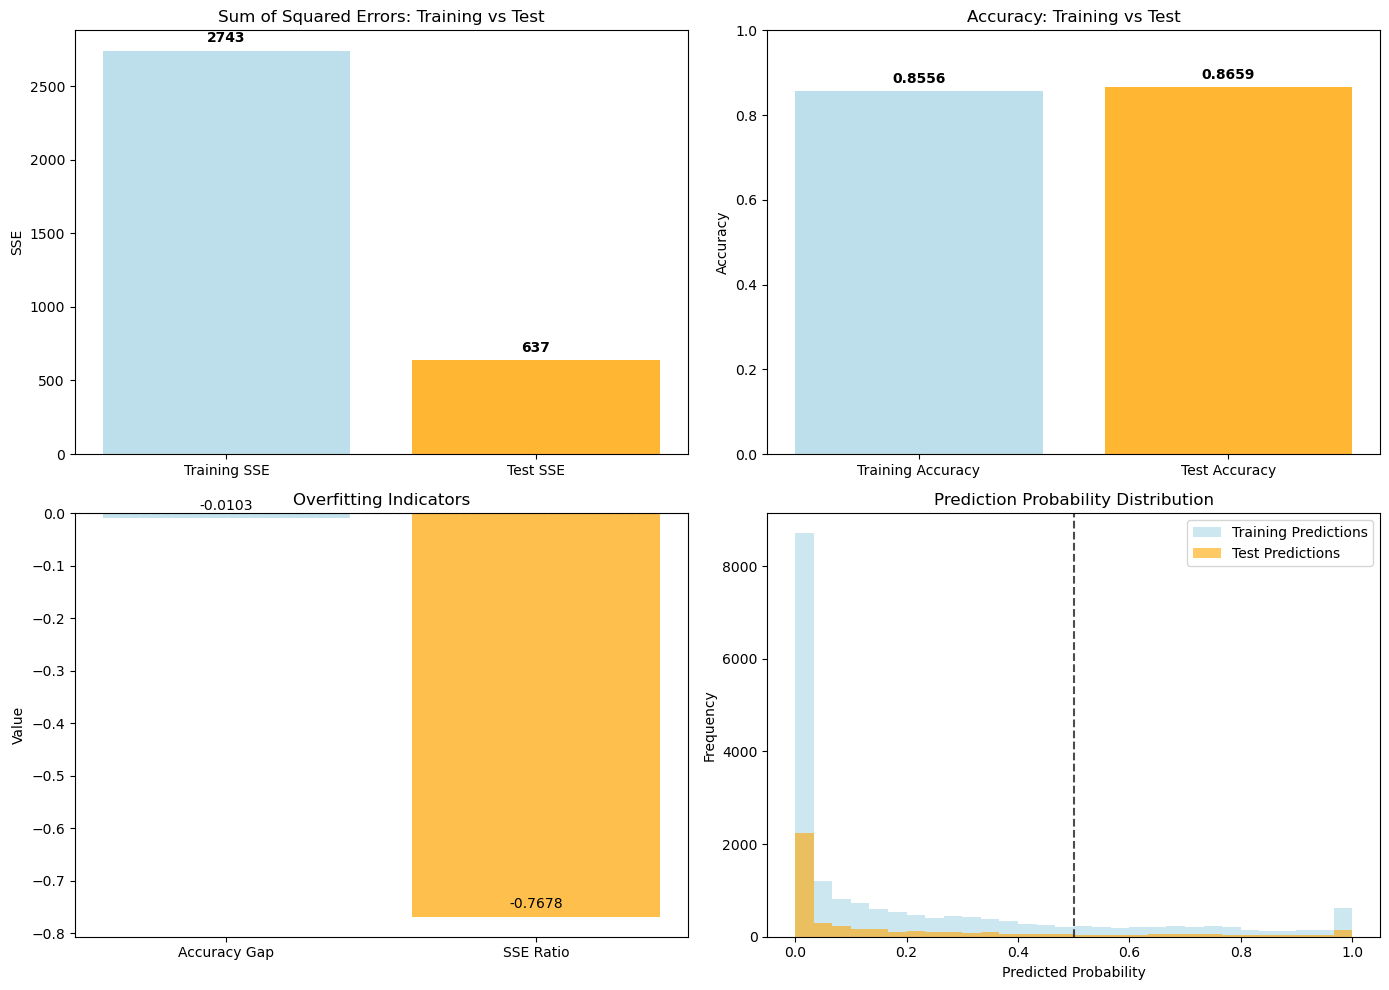

Overfitting & SSE Analysis
SSE Metrics:
Training SSE:    2,743
Test SSE:        637
SSE Ratio:       0.2322 (Test/Train)
Accuracy Metrics:
Training Acc:    0.8556
Test Acc:        0.8659
Accuracy Gap:    -0.0103

overfitting diagnosis:
 low overfitting
   model generalizes well
 good sse ratio - stable performance


In [ ]:
# Check Overfitting & SSE Analysis
def analyze_overfitting_sse(model, X_train, y_train, X_test, y_test):
    """
    Analyze overfitting and calculate SSE for training and test sets
    """
    # Get predictions for both sets
    train_pred_prob = model.predict(X_train, verbose=0).flatten()
    test_pred_prob = model.predict(X_test, verbose=0).flatten()

    train_pred = (train_pred_prob >= 0.5).astype(int)
    test_pred = (test_pred_prob >= 0.5).astype(int)

    # Calculate SSE
    train_sse = np.sum((y_train - train_pred) ** 2)
    test_sse = np.sum((y_test - test_pred) ** 2)

    # Calculate accuracy
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    # Overfitting analysis
    acc_gap = train_acc - test_acc
    sse_ratio = test_sse / train_sse if train_sse > 0 else float('inf')

    # Create visualization
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

    # Plot 1: SSE Comparison
    ax1.bar(['Training SSE', 'Test SSE'], [train_sse, test_sse],
            color=['lightblue', 'orange'], alpha=0.8)
    ax1.set_title('Sum of Squared Errors: Training vs Test')
    ax1.set_ylabel('SSE')
    for i, v in enumerate([train_sse, test_sse]):
        ax1.text(i, v + max(train_sse, test_sse) * 0.02, str(v), ha='center', fontweight='bold')

    # Plot 2: Accuracy Comparison
    ax2.bar(['Training Accuracy', 'Test Accuracy'], [train_acc, test_acc],
            color=['lightblue', 'orange'], alpha=0.8)
    ax2.set_title('Accuracy: Training vs Test')
    ax2.set_ylabel('Accuracy')
    ax2.set_ylim(0, 1)
    for i, v in enumerate([train_acc, test_acc]):
        ax2.text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

    # Plot 3: Overfitting Metrics
    metrics = ['Accuracy Gap', 'SSE Ratio']
    values = [acc_gap, sse_ratio - 1]  # Subtract 1 from ratio for better visualization
    colors = ['lightblue', 'orange']

    ax3.bar(metrics, values, color=colors, alpha=0.7)
    ax3.set_title('Overfitting Indicators')
    ax3.set_ylabel('Value')
    ax3.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    for i, v in enumerate(values):
        ax3.text(i, v + max(abs(min(values)), max(values)) * 0.02, f'{v:.4f}', ha='center')

    # Plot 4: Prediction Distribution
    ax4.hist(train_pred_prob, bins=30, alpha=0.6, label='Training Predictions', color='lightblue')
    ax4.hist(test_pred_prob, bins=30, alpha=0.6, label='Test Predictions', color='orange')
    ax4.set_title('Prediction Probability Distribution')
    ax4.set_xlabel('Predicted Probability')
    ax4.set_ylabel('Frequency')
    ax4.legend()
    ax4.axvline(x=0.5, color='black', linestyle='--', alpha=0.7, label='Threshold')

    plt.tight_layout()
    plt.show()

    # Print detailed analysis
    print("=" * 60)
    print("Overfitting & SSE Analysis")
    print("=" * 60)

    print(f"SSE Metrics:")
    print(f"Training SSE:    {train_sse:,}")
    print(f"Test SSE:        {test_sse:,}")
    print(f"SSE Ratio:       {sse_ratio:.4f} (Test/Train)")

    print(f"Accuracy Metrics:")
    print(f"Training Acc:    {train_acc:.4f}")
    print(f"Test Acc:        {test_acc:.4f}")
    print(f"Accuracy Gap:    {acc_gap:.4f}")

    print("\noverfitting diagnosis:")
    if acc_gap > 0.05:
        print(" high overfitting detected!")
        print("   training accuracy significantly higher than test accuracy")
    elif acc_gap > 0.02:
        print(" moderate overfitting")
        print("   some overfitting present but manageable")
    else:
        print(" low overfitting")
        print("   model generalizes well")

    if sse_ratio > 1.5:
        print(" high sse ratio - poor generalization")
    elif sse_ratio > 1.2:
        print(" moderate sse ratio - some concern")
    else:
        print(" good sse ratio - stable performance")

    return {
        'train_sse': train_sse, 'test_sse': test_sse, 'sse_ratio': sse_ratio,
        'train_acc': train_acc, 'test_acc': test_acc, 'acc_gap': acc_gap
    }

# run the analysis
results = analyze_overfitting_sse(best_model, X_train_scaled, y_train, X_val_scaled, y_val)